# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth up to 4 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Attempt each question*, even if you don't think you can solve it fully. 
### - *Comment* your code to explain what each part does. You will gain marks for well-commented code even if it does not exactly solve the problem. You will also lose marks for poorly commented code even if you get everything 100% correct.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

## 1

In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

(a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that

$$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$

[Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

(b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the typed lecture notes ([see Blackboard](https://tcd.blackboard.com)). Convince yourself that the anti-commutation relation

$$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$

holds for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
commutation and anti-commutation relations (or otherwise), verify the identity:

$$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  

where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.

(c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that

$$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$

Use this result to show that, in general,

$$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$

(d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:

$$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$

(e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

In [1]:


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import numpy.linalg as linalg
import scipy
from scipy.linalg import expm , cosm, sinm
style.use('seaborn-bright')


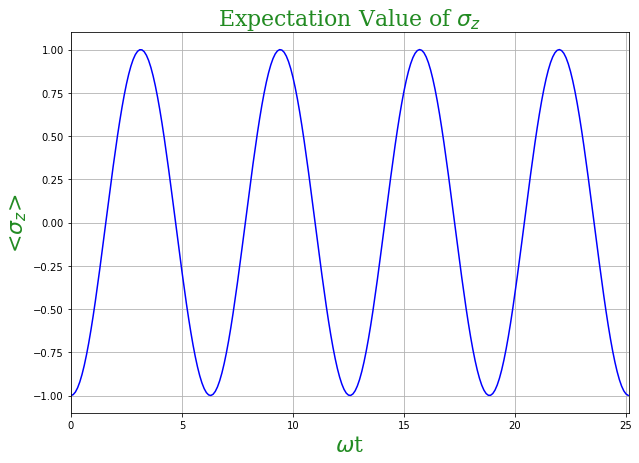

In [2]:

font = {'family': 'serif',
    'color':  'forestgreen',
    'weight': 'normal',
    'size': 22,
    }

def plot_expectation_value(x,y,ylabel,xlabel = '$\omega$t',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,8*np.pi],colour='b'):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('<'+ylabel+'>', fontdict=font)
    plt.title(f'Expectation Value of {ylabel}',fontdict=font)

   
x=list(np.arange(0,8*np.pi,0.1))
y=[-np.cos(i) for i in x]

plot_expectation_value(x,y, ylabel='$\sigma_z$')

## 2
Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 

(a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [3]:
# import numpy annd set all arrays I'll be using
import numpy as np
hw = 0.2
X = np.array([[0,1],[1,0]])
Y = np.array([[0,0-1j],[0+1j,0]])
Z = np.array([[1,0],[0,-1]])
UP = np.array([[1],[0]])
DOWN = np.array([[0],[1]])
sigma = np.array([[X],[Y],[Z]])
I = np.array([[1,0],[0,1]])

## let's define some time dependent functions for the hamiltonian. We'll need it later. They will do nothing for now. 

def fx(t=1):
    return 1

fy = fz = fx
    
        
def hamilton_matrix(u=[0,0,0],hw=0.2,t=1):
    ''' utility function to output 2x2 Hamiltonian'''
    sigma_x = (fx(t)*u[0]*X)
    sigma_y = (fy(t)*u[1]*Y)
    sigma_z = (fz(t)*u[2]*Z)
    return (hw/2)*(sigma_x+sigma_y+sigma_z)

H=hamilton_matrix(u = [1/np.sqrt(2),1/np.sqrt(2),0], hw = hw)
print('Hamiltonian is \n',H)

print('\nIs the square of the Hamiltonian a scalar factor of the identity (where scalar is (hw/2)**2)?\n')
print(np.isclose(H@H,((hw/2)**2)*I))


Hamiltonian is 
 [[0.        +0.j         0.07071068-0.07071068j]
 [0.07071068+0.07071068j 0.        +0.j        ]]

Is the square of the Hamiltonian a scalar factor of the identity (where scalar is (hw/2)**2)?

[[ True  True]
 [ True  True]]


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [4]:
init_state = DOWN
print('init state is\n',init_state)

print('\nH@phi(0) is \n',H@init_state)

print('\nH@phi(0) is not a scalar multiple of phi(0), so the init state cannot be a eigenstate')

x = np.linalg.eigh(H)
print('\nEigenstates of H are \n',x[1])

init state is
 [[0]
 [1]]

H@phi(0) is 
 [[0.07071068-0.07071068j]
 [0.        +0.j        ]]

H@phi(0) is not a scalar multiple of phi(0), so the init state cannot be a eigenstate

Eigenstates of H are 
 [[-0.70710678-0.j  -0.70710678+0.j ]
 [ 0.5       +0.5j -0.5       -0.5j]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [5]:
#set hbar = 1 --> w = 0.2

def time_evolution_operator(matrix,time_interval,const=1):
    '''return the time evolution operator for a given time interval and matrix'''
    return(expm(-1j*const*time_interval*matrix))

U_t = time_evolution_operator(H,0.05)

print('U_t is ','\n', U_t)
print('\nU_t_dagger = ','\n', U_t.conj().T)
print('\nU_t_inverse = ','\n', linalg.inv(U_t),'\n')


# Compare hermitian conjugate and inverse of U. If they are equal (within floating point tolerance), then U is unitary
print('Is hermitian conjugate equal to inverse?\n')
print(np.isclose(U_t.conj().T,linalg.inv(U_t)))

print('\nThus, U_t is unitary')

U_t is  
 [[ 0.9999875 +0.j         -0.00353552-0.00353552j]
 [ 0.00353552-0.00353552j  0.9999875 +0.j        ]]

U_t_dagger =  
 [[ 0.9999875 -0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 -0.j        ]]

U_t_inverse =  
 [[ 0.9999875 +0.j          0.00353552+0.00353552j]
 [-0.00353552+0.00353552j  0.9999875 +0.j        ]] 

Is hermitian conjugate equal to inverse?

[[ True  True]
 [ True  True]]

Thus, U_t is unitary


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

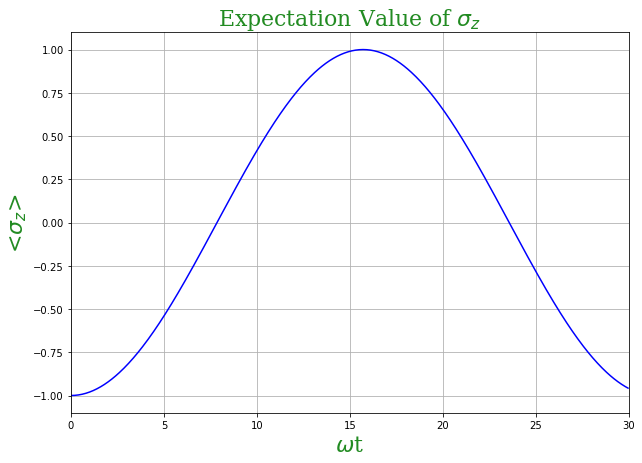

In [6]:
## create variables
max_wt = 30
interval = 0.05
wt = np.arange(0,max_wt,interval)
states = []
states.append(DOWN)

## define my expectation function
def expectation_value(operator,state):
    ''' returns the expectation value for a given state and operator'''
    result = operator.T.conj() @ state @ operator
    return float(result[0,0].real)

def expectation_value_temporal(max_time, states, state,time_operator,time_interval = 0.05):
    ''' returns the expectation value per discrete time window for a given state and operator'''
    max_bucket = int(max_time/time_interval)
    # set up my empty results table 
    results = np.zeros((max_bucket,len(states)))
    # enumerate my states into a dict so i can update in a loop
    init_state_dict = dict(enumerate(states))
    # loop over each time window and initial state
    for i in range(max_bucket):
        for j in range(len(init_state_dict)):
            results[i,j] = expectation_value(init_state_dict[j],state.real)
            init_state_dict[j] = time_operator @ init_state_dict[j]
    # return the output
    return results

results = expectation_value_temporal(max_wt, states, Z,U_t)                                                                                                                                        

# plot the expectation value of sigma_z
plot_expectation_value(x=wt, y=results, ylabel='$\sigma_z$',x_range=[0,30])

## 3
Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

(a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation

$$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$

where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.



(b) Show that the same equation can be expressed in the form

$$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$

and find an explicit expression for the matrix $\mathbf{M}$.

(c) Convince yourself that the explicit solution of the above equation is 

$$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$

Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

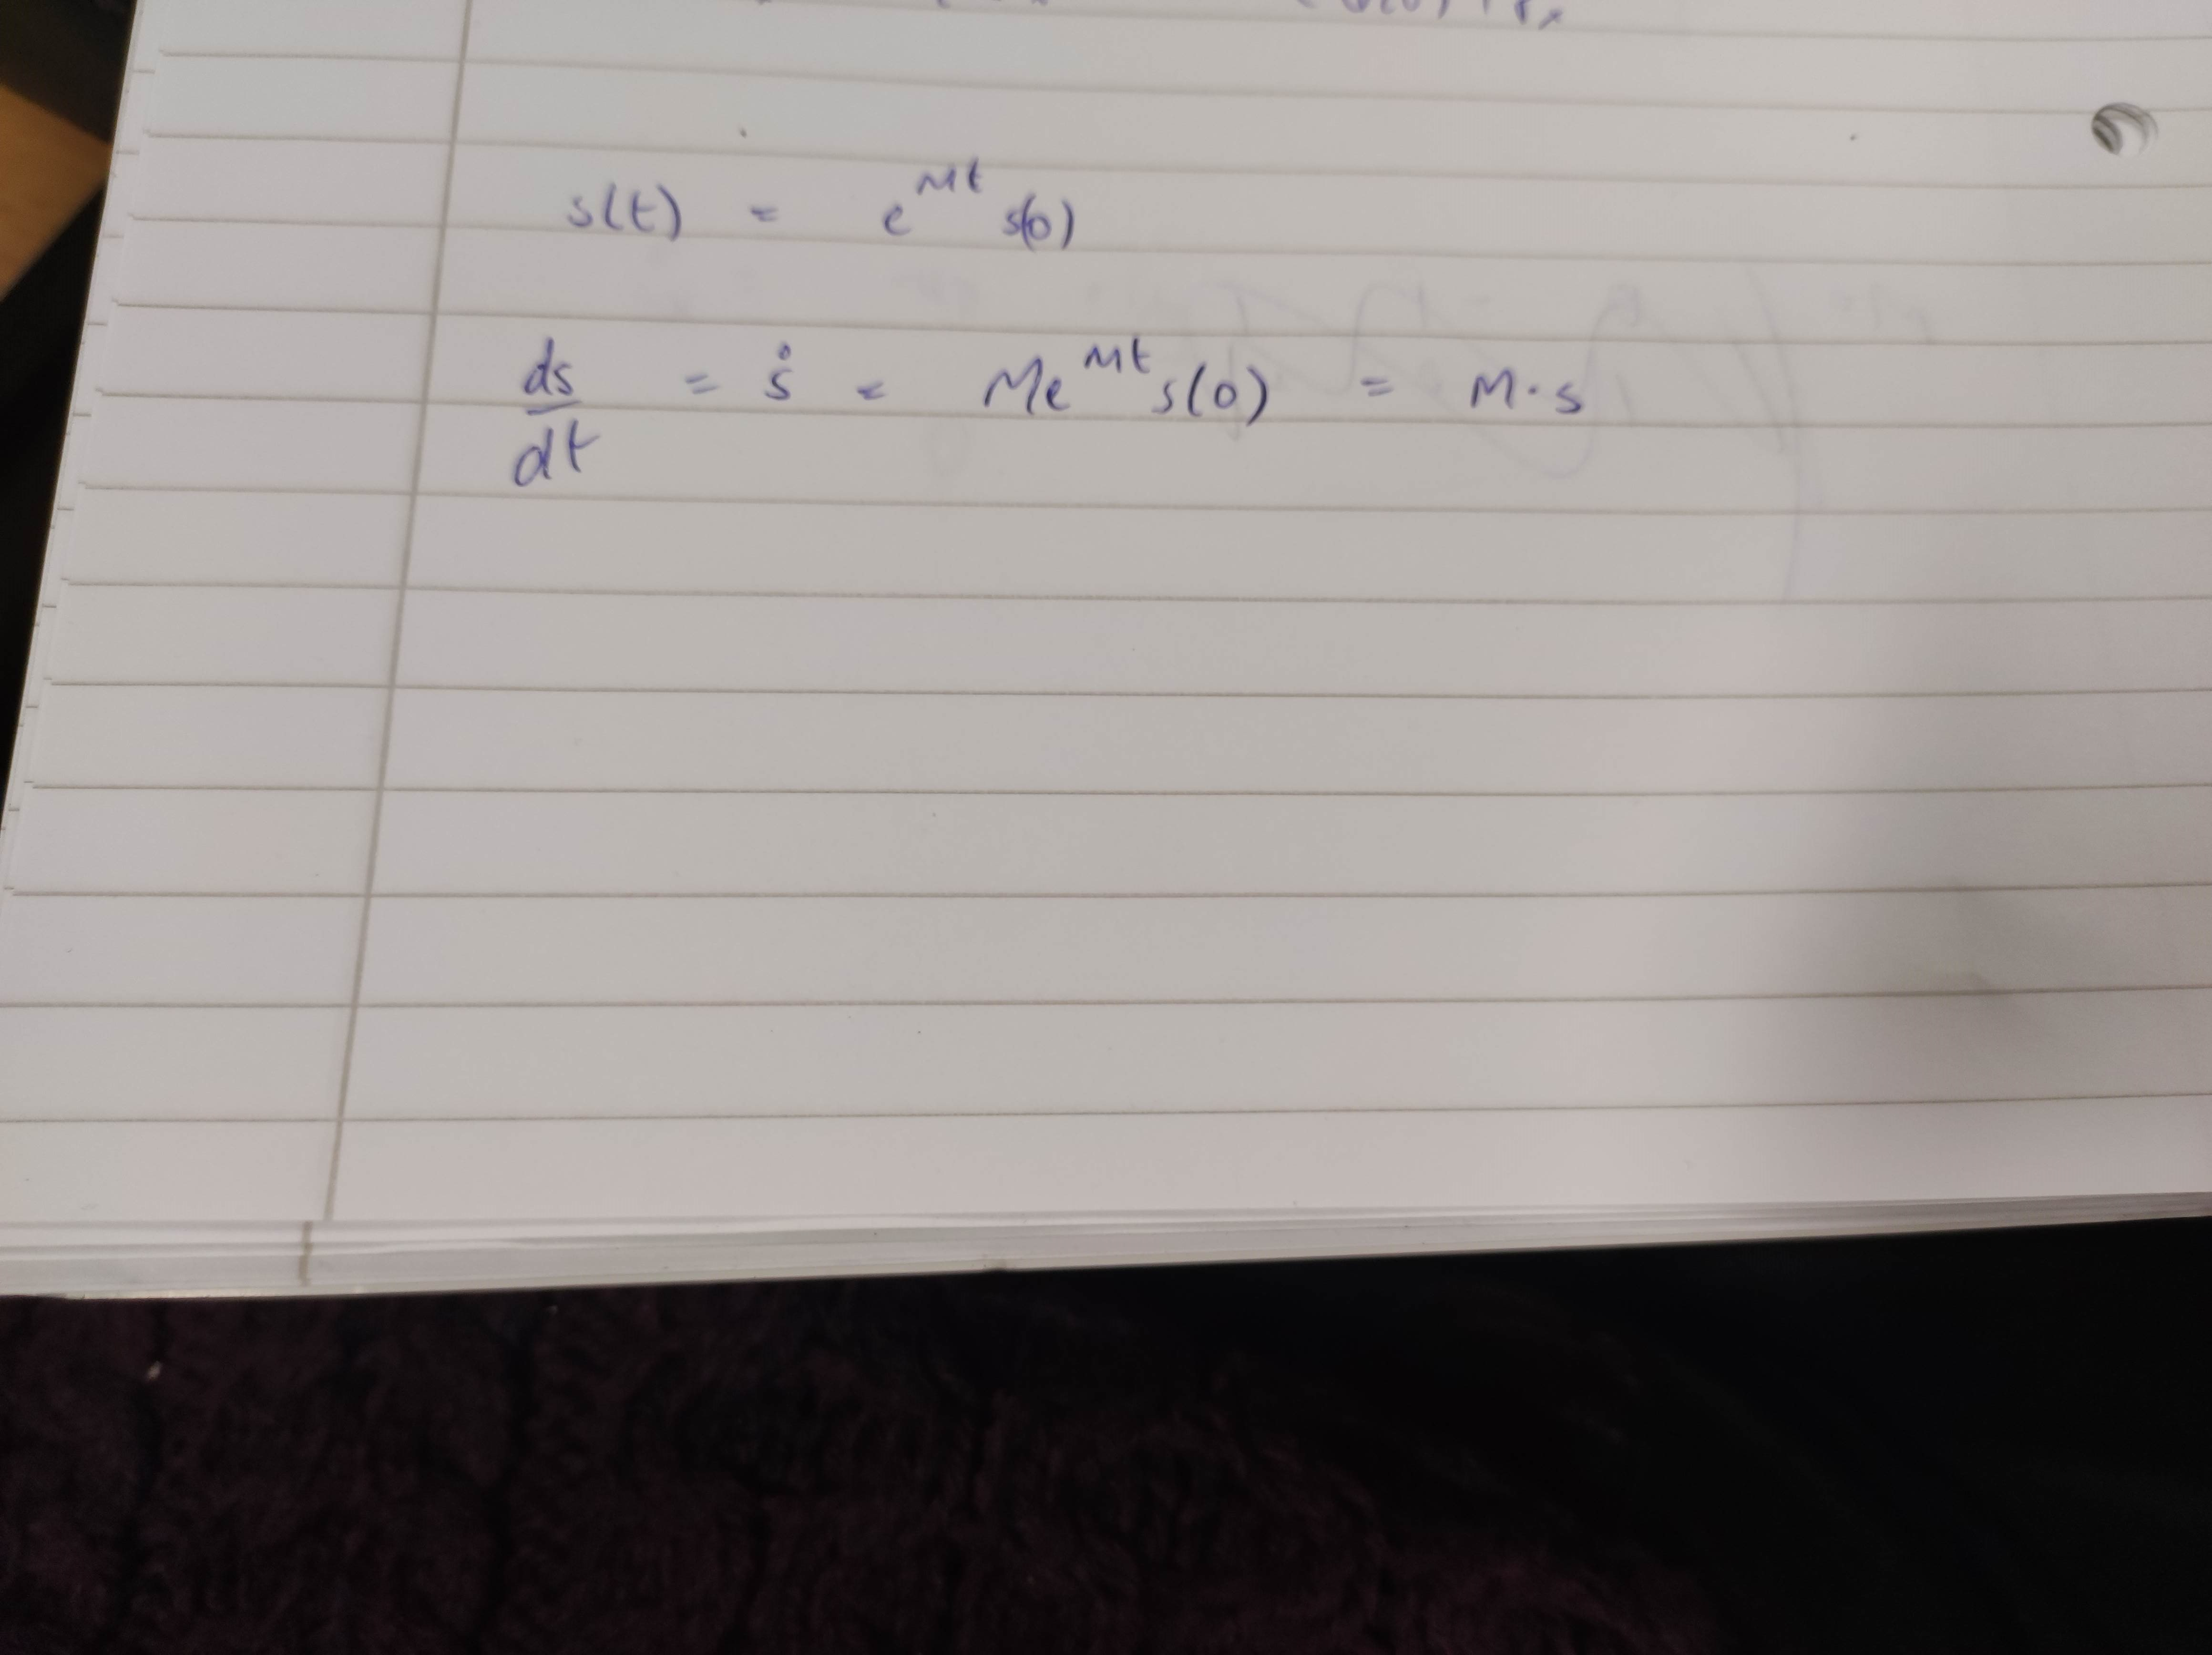

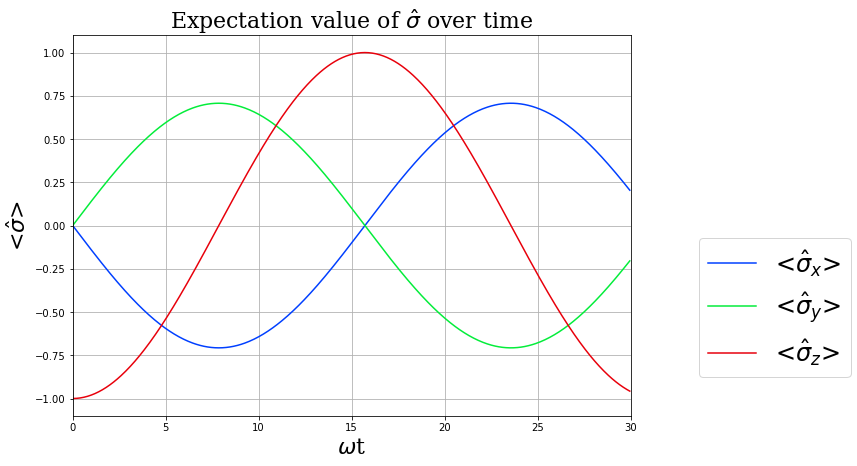

In [7]:
#define my M matrix

def M_matrix(u):
    '''baby function to return my 3x3 matrix '''
    return 0.2*np.array([[0,-u[2],u[1]],[u[2],0,-u[1]],[-u[1],u[0],0]])
M = M_matrix(u = [1/np.sqrt(2),1/np.sqrt(2),0])
#define a multi plot function for expectation value of the Pauli matrices
def multi_plot_expectation_value(results,fig_size=[10.0,7.0],plot_grid=True,x_range=[0,30]):
    '''return the plot of pauli matrices expected value'''
    plt.figure(figsize = fig_size)
    plt.plot(wt,results.T[0],label = '<$\hat{\sigma}_x$>')
    plt.plot(wt,results.T[1],label = '<$\hat{\sigma}_y$>')
    plt.plot(wt,results.T[2],label = '<$\hat{\sigma}_z$>')
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.legend(fontsize=24,bbox_to_anchor=(1.1, 0.5))
    font["color"] = 'black'
    plt.title('Expectation value of $\hat{\sigma}$ over time',fontdict=font)
    plt.xlabel('$\omega$t',fontdict=font)
    plt.ylabel('<$\hat{\sigma}$>',fontdict=font)
    plt.show()

# initialise my expectation vector
s_0 = [(expectation_value(init_state,j)) for j in sigma]

# create a zero array to populate 
results = np.zeros((int(max_wt/interval),3))

#iterate over each time bucket. store results
for i in range(int(max_wt/interval)):
    results[i] = (expm(i*interval*M)@s_0).T

#plot the results
multi_plot_expectation_value(results)


## 4
Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

Hint: you may find the following result useful
$$ \int_0^t {\rm d}t'\, \sin[\omega_a(t-t')] \sin(\omega_{b}t') = \frac{\omega_a \sin(\omega_b t) - \omega_b \sin(\omega_a t)}{\omega_a^2 - \omega_b^2}.$$

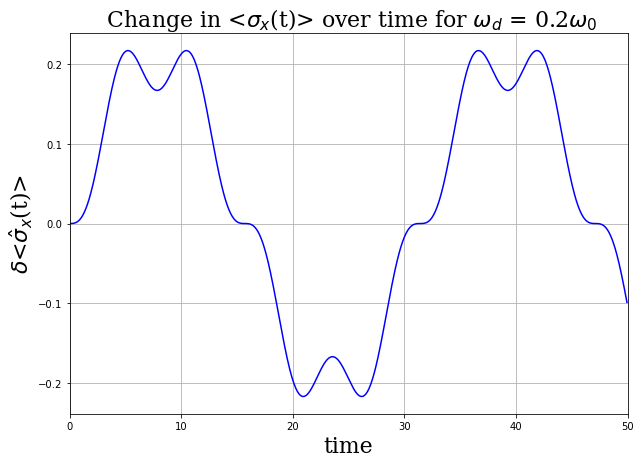

In [8]:
x = np.arange(0,50,0.05)
def plot_observables_change(x,y,w_d,ylabel='$\delta $<$\hat{\sigma}_x$(t)>',xlabel = 'time',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,50],colour='b'):
    '''plot change in observables over a given time window. Time is discrete and graph will interpolate'''
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel(ylabel, fontdict=font)
    plt.title(f' Change in <$\sigma_x$(t)> over time for $\omega_d$ = {w_d}$\omega_0$',fontdict=font)

def observables_change_data(t,w_d):
    '''function to output data for given time window'''
    w_0 = 1
    om = 0.1
    return (2*w_0*om)*((w_0*np.sin(w_d*t))-(w_d*np.sin(w_0*t)))/(w_0**2 - w_d**2)
    
# run over a loop for each time interval
results=[observables_change_data(i,w_d=0.2) for i in x]

#plot the results
plot_observables_change(x,results,w_d=0.2)


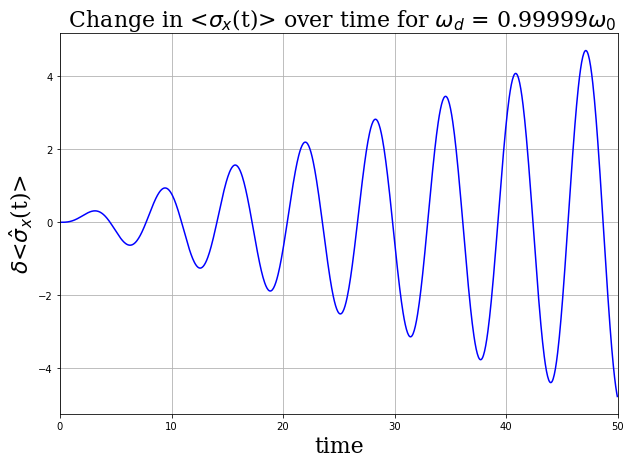

In [9]:
# let's ramp up our drive frequency 
results=[observables_change_data(i,w_d=0.99999) for i in x]
plot_observables_change(x,results,w_d=0.99999)


As $\omega_d$ tends to $\omega_0$, we approach ideal resonance between drive and ground state frequencies. This results in high fidelity as the expected state quickly and reliably flips between measurable states.

## 5
A driven two-level system is described in the interaction picture by the Hamiltonian

$$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

## 6
Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

$$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$

For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is

$$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$

where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that

$$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      

Now specialise to a driven qubit with Hamiltonian

$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

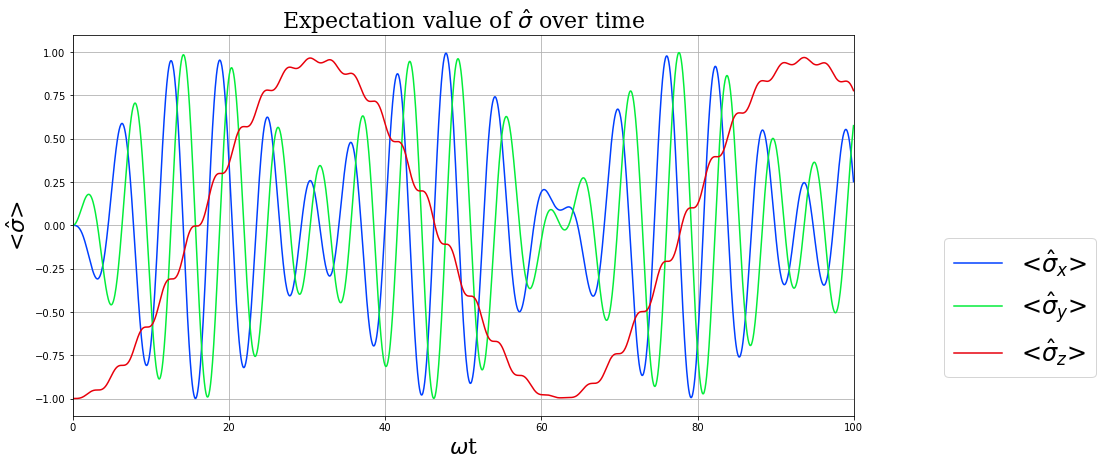

In [10]:
#define variables
#lets use w_0 = 1 for convenience
w_0,rabi_freq,w_d,max_wt,interval = 1,0.1,0.99,100,0.05
wt = np.arange(0,max_wt,interval)

## now we can use our functions for time-dependent Hamiltionian
def fx(t=1):
    return 2*rabi_freq*np.sin(w_d*t)


#initialise the qubit
phi_t = DOWN

#reset the results table
results = np.zeros((int(max_wt/interval),3))

## iterate over the time buckets
for i in range(int(max_wt/interval)):
    results[i] = [(expectation_value(phi_t,j).real) for j in sigma]
    U_t = time_evolution_operator(hamilton_matrix(u=[1,0,1],hw=1, t=i*interval),interval)
    phi_t = U_t @ phi_t

## plot
multi_plot_expectation_value(results,fig_size=[14.0,7.0],x_range=[0,max_wt])


The rotating wave approximation assumes that the drive frequency is dominant compared to the other energy scales i.e. we can apply RWA where $\omega_d$ >> $\Omega$   

In the first graph (above),  we can apply RWA as $\omega_d$ is ~9 times larger than the Rabi frequency, and so we can satisfactorily neglect the fast oscillating terms. The small oscillations can be seen in $\sigma_z$

In the second graph (below), RWA is not valid as the Rabi frequency is larger than the drive frequency, and so we cannot apply RWA as the oscillating terms are not neglible.

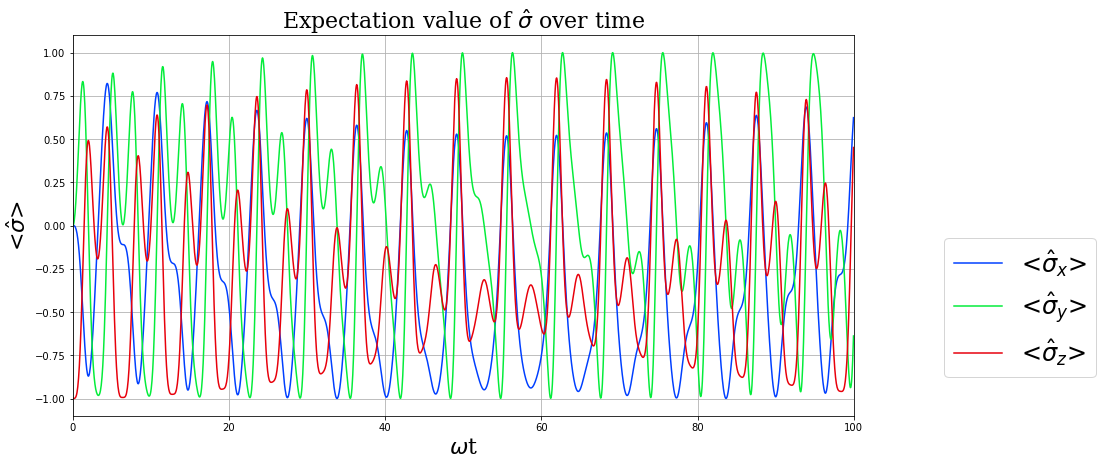

In [11]:
#now with omega = w_0
rabi_freq = w_0

#initialise the qubit
phi_t = init_state
results = np.zeros((int(max_wt/interval),3))

## for loop to iterate over time intervals to generate list of expectation values
for i in range(int(max_wt/interval)):
    results[i] = [(expectation_value(phi_t,j).real) for j in sigma]
    U_t = time_evolution_operator(hamilton_matrix(u=[1,0,1],hw=1, t=i*interval),interval)
    phi_t = U_t @ phi_t

## plot using my expectation func
multi_plot_expectation_value(results,fig_size=[14.0,7.0],x_range=[0,max_wt])

## 7
Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

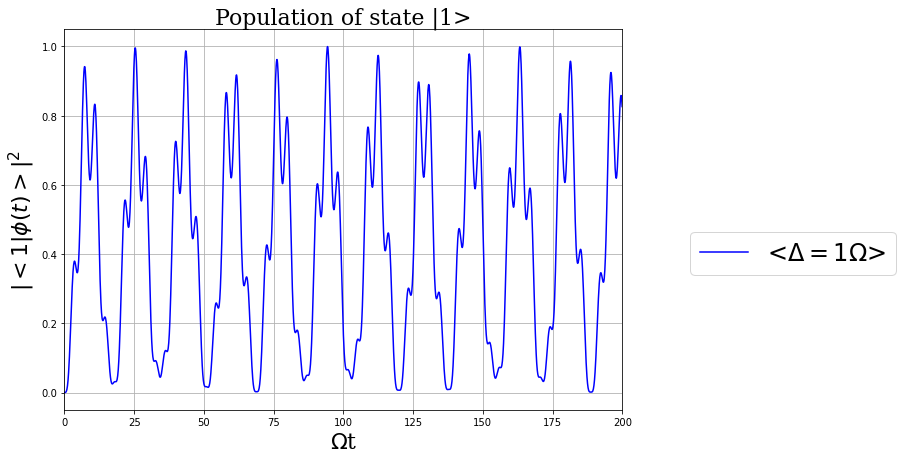

In [12]:
#define our range and time buckets
wt=np.arange(0,200,0.1)

## let's define the function for the population of the 1 state
def pop_1(wt,factor=1):
    '''function to output population of 1 state for a given time window and detuning factor'''
    root_k = np.sqrt(2+(factor**2))
    cos_part = np.cos(root_k/2*wt)
    sin_part = (factor/root_k)*1j*np.sin(root_k/2*wt)
    exp_part = np.exp(-1j*factor*wt/2)*(cos_part+sin_part)
    final_part = 0.5*(-1+exp_part)
    #print(final_part)
    #print(final_part.conj)
    #return abs(final_part*np.conj(final_part))
    return abs(final_part)**2
    
# let's define a function to plot our populations
def plot_pop_value(y,ylabel,x=wt,xlabel = '$\Omega$t',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,200],colour='b',factor=1):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour,label = f'<$\Delta={factor}\Omega$>')
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.legend(fontsize=24,bbox_to_anchor=(1.1, 0.5))
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('$|<'+ylabel+'|\phi(t)>|^2$', fontdict=font)
    plt.title(f'Population of state |{ylabel}>',fontdict=font)



#run the evaluation for each time bucket
results=[pop_1(i) for i in list(wt)]


#plot the data
plot_pop_value(y=results,ylabel='1',factor=1)


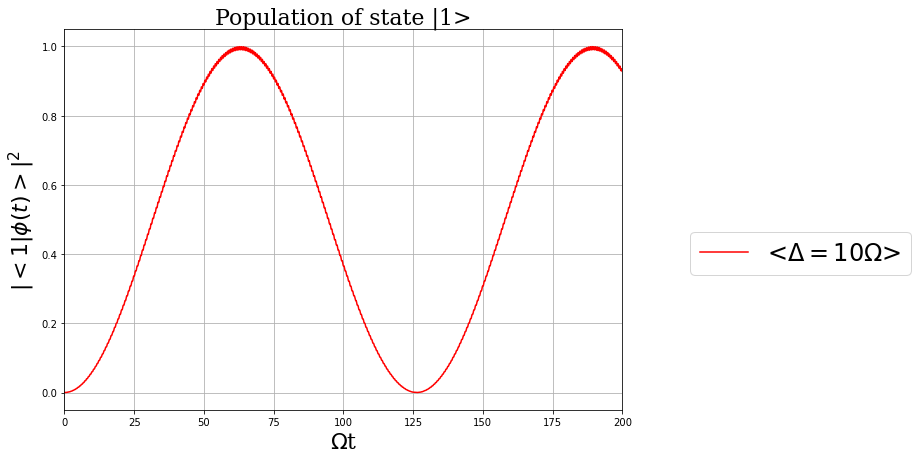

In [13]:
#run the evaluation with larger detuning
results=[pop_1(i,factor=10) for i in wt]
plot_pop_value(y=results,colour='r',ylabel='1',factor=10)

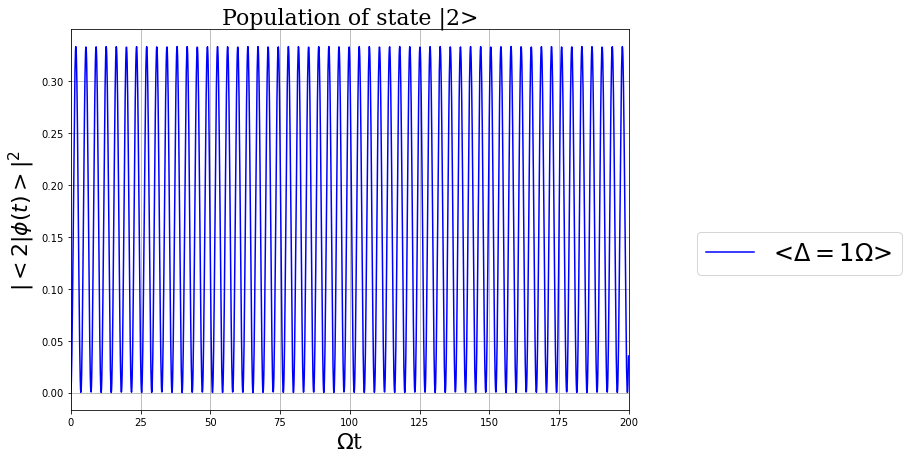

In [14]:
## let's define the function for the population of the 1 state

def pop_2(wt,factor=1):
    '''function to output population of 2 state for a given time window and detuning factor'''
    root_k = np.sqrt(2+(factor**2))
    sin_part = np.sin(root_k*wt/2)
    
    x = (-1/root_k)*(sin_part)
    return abs(x**2)

# loop the results
results=[pop_2(i,factor=1) for i in wt]

#plot the data
plot_pop_value(y=results,ylabel='2',factor=1)

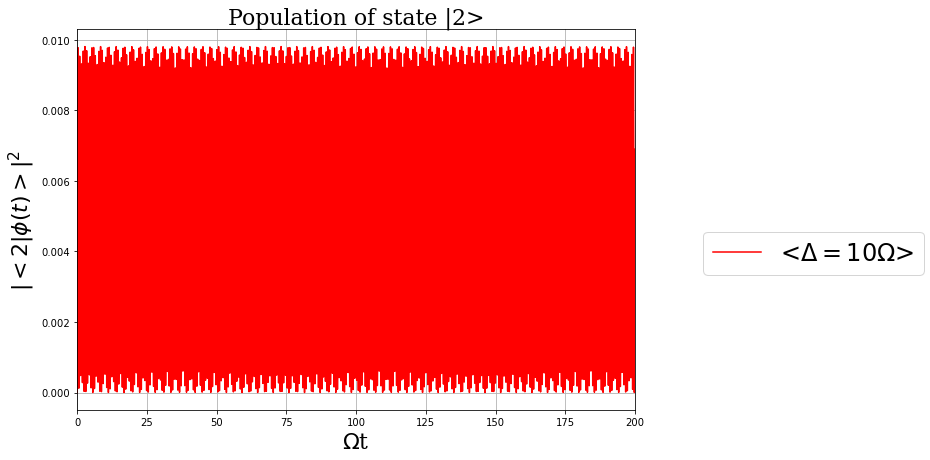

In [15]:
results=[pop_2(i,factor=10) for i in wt]
plot_pop_value(y=results,ylabel='2',colour='r',factor=10)

The large detuning (where $\Delta = 10\Omega$ ), this gives us Rabi oscillations. the level 2 qubit is almost never expected to be excited, which means that it acts like an ancillary qubit as in the lambda system. This gives little decoherence and high fidelity :). 

When the detuning is reduced  ($\Delta = \Omega$), we don't see Rabi oscillations as much, as the fast oscillating terms are more significant, as well as an increased population for the 2 state..

## 8
(a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [16]:
H = -0.5*np.kron(Z,I)-0.25*np.kron(I,Z)+0.125*(np.kron(X,X)+np.kron(Y,Y))+0.05*(np.kron(Z,Z))
print('Hamiltonian is \n',H)

eig = np.linalg.eigh(H)
print('\nEigenvalues of H are \n',eig[0])
print('\nEigenstates of H are \n',eig[1],'\n')
#let's take the ground state as the eigenstate of the lowest eigenvalue

ground_state = (eig[1][np.where(eig[0] == eig[0].min())])

overlap = (ground_state@np.kron(UP,DOWN))[0][0]
print('\nOverlap is',overlap)

Hamiltonian is 
 [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]

Eigenvalues of H are 
 [-0.7        -0.40355339  0.30355339  0.8       ]

Eigenstates of H are 
 [[ 1.        +0.j  0.        +0.j -0.        -0.j  0.        +0.j]
 [ 0.        +0.j -0.92387953+0.j -0.38268343-0.j  0.        +0.j]
 [ 0.        +0.j  0.38268343+0.j -0.92387953-0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.        -0.j  1.        +0.j]] 


Overlap is 0j


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

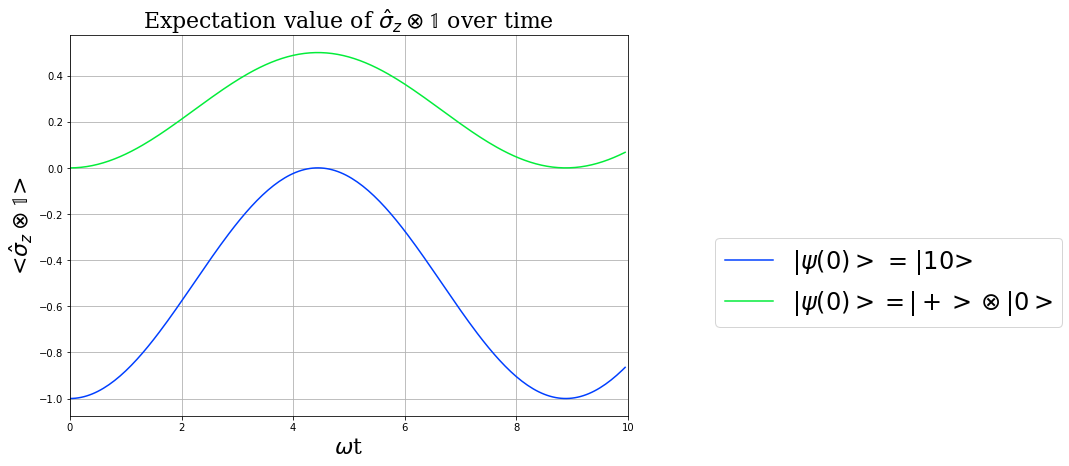

In [17]:
#create my variables
# ran out of time so this is not as clean as i would like !

U_t = time_evolution_operator(H,0.05)
max_t = 10
interval = 0.05
wt = np.arange(0,max_t,interval)
state_1= np.array([[0],[1]])
state_0 = np.array([[1],[0]])
state_plus=(1/np.sqrt(2))*np.array([[1],[1]])

results = np.zeros((int(max_t/interval),2))
states = []
states.append(np.kron(state_1,state_0))
states.append(np.kron(state_plus,state_0))

# run my discretised expectation function to generate my results for two initial states
results = expectation_value_temporal(max_t, states, np.kron(Z,I),U_t)                                                                                                                                        


# plot the data
plt.figure(figsize = [10.0,7.0])
plt.plot(wt,results.T[0],label = '$|\psi(0)>$ = |10>')
plt.plot(wt,results.T[1],label = '$|\psi(0)> = |+>\otimes |0>$')
#plt.plot(wt,results.T[2],label = '<$\hat{\sigma}_z$>')
plt.xlim([0,10])
plt.grid(True)
plt.legend(fontsize=24,bbox_to_anchor=(1.8, 0.5))
font["color"] = 'black'
plt.title('Expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ over time',fontdict=font)
plt.xlabel('$\omega$t',fontdict=font)
plt.ylabel('<$\hat{\sigma}_z\otimes \mathbb{1}$>',fontdict=font)
plt.show()



(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [18]:
#define my empty lists and append the kron product in each case
Lz = []
Lx = []
Ly = []
Lz.append(np.kron(Z,I))
Lz.append(np.kron(I,Z))

Ly.append(np.kron(Y,I))
Ly.append(np.kron(I,Y))

Lx.append(np.kron(X,I))
Lx.append(np.kron(I,X))

# define the hamiltonian using the lists
H1 = -0.5*Lz[0]-0.25*Lz[1]+0.125*(Lx[0]@Lx[1] + Ly[0]@Ly[1]) + 0.05*(Lz[0]@Lz[1])
print (H1)
print(Lx)


[[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]
[array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]]), array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])]


(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [19]:
# define a function per state
def tensor_loop(num,state):
    r = []
    for i in range(num):
        ops = [I]*num
        ops[i] = state
        res = ops[0]
        for j in range(1,num):
            res = np.kron(res,ops[j])
            if j == (num-1):
                r.append(res)
                
    return(r)

#run the function over each pauli matrix
def pauli_tensor_loop(n):
    return [tensor_loop(n,j) for j in sigma]

pauli_tensor_loop(4)
    


[[array([[[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 

(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

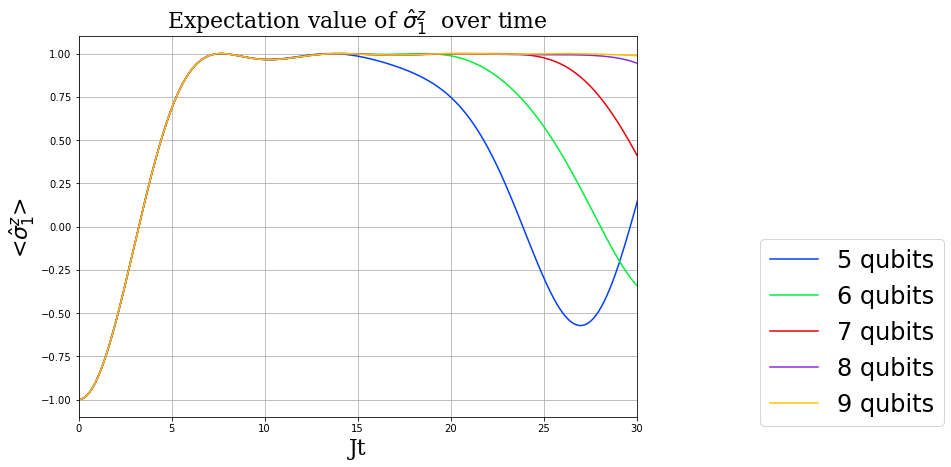

In [20]:
def hamiltonian_per_dim(n,w=1,V=0,J=0.5):
    '''output my hamiltonian for given dimension'''
    x = tensor_loop(n,X)
    y = tensor_loop(n,Y)
    z = tensor_loop(n,Z)
    part_a = sum(z)
    part_b = sum(x[i]@x[i+1]+y[i]@y[i+1] for i in range(n-1))
    part_c = sum(z[i]@z[i+1] for i in range(n-1))
    return (-1*w/2*part_a)+(0.25*J*part_b)+(V/2*part_c)

wt = np.arange(0,max_wt,0.05)
def init_state_per_dim(n):
    '''output my initial state for given dimension'''
    res = DOWN
    for j in range(n-1):
        res = np.kron(res,UP)
    return res

def time_evolution_n_dim(n,interval=0.05,V=0,J=0.5):
    '''output my time evolution data for given dimension'''
    states = []
    states.append(init_state_per_dim(n))
    U_t = time_evolution_operator(hamiltonian_per_dim(n,V=V,J=J),interval)

    results = expectation_value_temporal(max_wt, states, tensor_loop(n,Z)[0],U_t)    
    return results

def plot_time_evolotion_n_dim(interval=0.05,V=0,J=0.5,title=''):
    '''output my plot for given dimension'''
    results = []

    for i in range(5):
        results.append(time_evolution_n_dim(i+5,V=V,J=J))

    plt.figure(figsize = [10.0,7.0])
    plt.plot(wt,results[0],label = '5 qubits')
    plt.plot(wt,results[1],label = '6 qubits')
    plt.plot(wt,results[2],label = '7 qubits')
    plt.plot(wt,results[3],label = '8 qubits')
    plt.plot(wt,results[4],label = '9 qubits')

    plt.xlim([0,30])
    plt.grid(True)
    plt.legend(fontsize=24,bbox_to_anchor=(1.2, 0.5))
    font["color"] = 'black'
    plt.title('Expectation value of $\hat{\sigma}_1^z$ '+title+' over time',fontdict=font)
    plt.xlabel('Jt',fontdict=font)
    plt.ylabel('<$\hat{\sigma}_1^z$>',fontdict=font)
    plt.show()
    
# run with no interaction
plot_time_evolotion_n_dim()

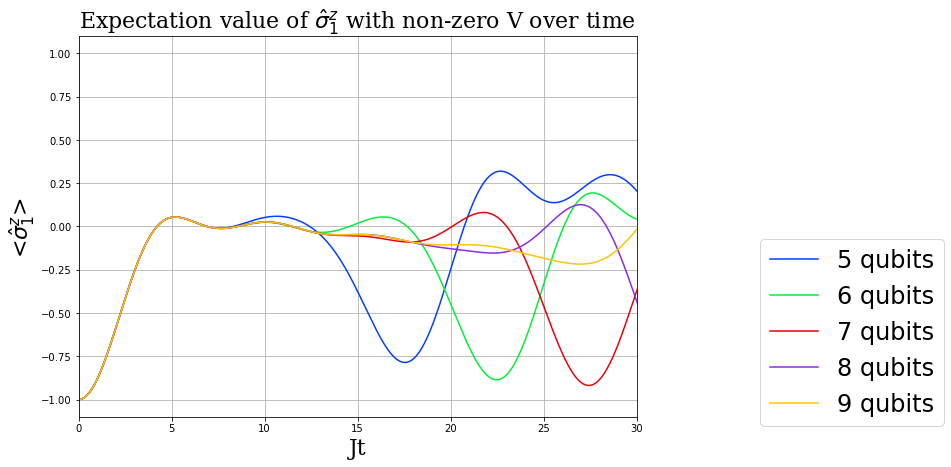

In [21]:
# now run it with a small interaction strength
plot_time_evolotion_n_dim(V=0.5,title='with non-zero V')

With no interaction, we see that qubits quickly flip their state with high fidelity. After a period, decoherence begins to arrive and provide a murkier view on the qubit's expectation value. However, as we add more qubits the decoherence takes longer to take effect

When we add interaction, this reduces the resonance between energy states, meaning the initial 'flip' is not as strong. This is expected as the higher the resonance, the strong the excitation between states.
